In [40]:
import numpy as np
import time

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

from mpl_toolkits.mplot3d import Axes3D

import os

from data import TESTDATA

body_edges = np.array(
[[0,1], [1,2],[2,3],[0,4],
[4,5],[5,6],[0,7],[7,8],[7,9],[9,10],[10,11],[7,12],[12,13],[13,14]]
)
n_joints=15

In [43]:
test_dataset = TESTDATA(dataset="mupots")
all_results = np.load("output/test_all_results_220614-1029_mupots_True.npy")

In [42]:
from visualization import plot_scene_gif

MovieWriter ffmpeg unavailable; using Pillow instead.


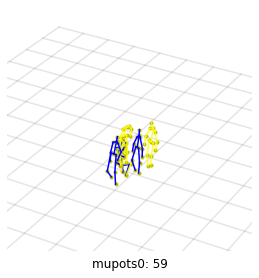

In [44]:
plot_scene_gif("mupots0.gif", all_results[0], *test_dataset[0], title="mupots0")

In [39]:
i, o = test_dataset[0]
i.shape, o.shape

((3, 15, 45), (3, 46, 45))

In [6]:
all_results.shape

(209, 3, 45, 45)

In [14]:
def make_plotable(results, input_seq, output_seq):
    """
    Parameters
    ----------
    results: array of shape (#people, #frames, #joints*3)
    input_seq: output of DATALOADER
    output_seq: output of DATALOADER

    Returns
    -------
    arrays needed by plot()
    """
    rec=results[:,:,:]
        
    rec=rec.reshape(results.shape[0],-1,n_joints,3)
        
    input_seq=input_seq.reshape(results.shape[0],15,n_joints,3)
    pred=np.concatenate([input_seq,rec],axis=1)
    output_seq=output_seq.reshape(results.shape[0],-1,n_joints,3)[:,1:,:,:]
    all_seq=np.concatenate([input_seq,output_seq],axis=1)

    return pred, all_seq

In [34]:
def animate(i):
            
    #ax.lines = []
    ax.clear()

    for x_i in range(p_x.shape[0]):
        temp_x=[p_x[x_i],p_x[x_i]]
        temp_y=[p_y[0],p_y[-1]]
        z=[0,0]
        ax.plot(temp_x,temp_y,z,color='black',alpha=0.1)

    for y_i in range(p_x.shape[0]):
        temp_x=[p_x[0],p_x[-1]]
        temp_y=[p_y[y_i],p_y[y_i]]
        z=[0,0]
        ax.plot(temp_x,temp_y,z,color='black',alpha=0.1)

    for j in range(pred.shape[0]): # for each person
                
        xs=pred[j,i,:,0]
        ys=pred[j,i,:,1]
        zs=pred[j,i,:,2]
                
        alpha=1
        # plot predicted joints as dots
        ax.plot( zs,xs, ys, 'y.',alpha=alpha)
                
        if gt:
            x=all_seq[j,i,:,0]
                    
            y=all_seq[j,i,:,1]
            z=all_seq[j,i,:,2]
                
                
            # plot actual joints as dots
            ax.plot( z,x, y, 'y.')


        plot_edge=True
        if plot_edge:
            for edge in body_edges:
                x=[pred[j,i,edge[0],0],pred[j,i,edge[1],0]]
                y=[pred[j,i,edge[0],1],pred[j,i,edge[1],1]]
                z=[pred[j,i,edge[0],2],pred[j,i,edge[1],2]]
                if i>=15:
                    # blue = prediction
                    ax.plot(z,x, y, zdir='z',c='blue',alpha=alpha)
                            
                else:
                    # green = input
                    ax.plot(z,x, y, zdir='z',c='green',alpha=alpha)
                        
                if gt:
                    x=[all_seq[j,i,edge[0],0],all_seq[j,i,edge[1],0]]
                    y=[all_seq[j,i,edge[0],1],all_seq[j,i,edge[1],1]]
                    z=[all_seq[j,i,edge[0],2],all_seq[j,i,edge[1],2]]
                        
                    if i>=15:
                        # yellow = baseline
                        ax.plot( z,x, y, 'yellow',alpha=0.8)
                    else:
                        ax.plot( z, x, y, 'green')
                        
                
    ax.set_xlim3d([-3 , 3])
    ax.set_ylim3d([-3 , 3])
    ax.set_zlim3d([0,3])
                # ax.set_xlim3d([-8 , 8])
                # ax.set_ylim3d([-8 , 8])
                # ax.set_zlim3d([0,5])
                # ax.set_xticklabels([])
                # ax.set_yticklabels([])
                # ax.set_zticklabels([])
    ax.set_axis_off()
                #ax.patch.set_alpha(1)
                #ax.set_aspect('equal')
                #ax.set_xlabel("x")
                #ax.set_ylabel("y")
                #ax.set_zlabel("z")
    plt.title(str(i),y=-0.1)
        
    

In [35]:
i0,o0 = test_dataset[0]
r0 = all_results[0]

pred, all_seq = make_plotable(r0, i0, o0)

/home/muller/.conda/envs/mrt/lib/python3.7/site-packages/matplotlib/animation.py:888: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  'Animation was deleted without rendering anything. This is '
MovieWriter ffmpeg unavailable; using Pillow instead.


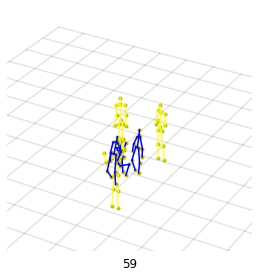

In [38]:
gt=True

fig = plt.figure(figsize=(10, 4.5))
fig.tight_layout()
ax = fig.add_subplot(111, projection='3d')
        
plt.ion()
        
length_=45+15

p_x=np.linspace(-10,10,15)
p_y=np.linspace(-10,10,15)
        
        
#while i < length_: # for each frame

ani = animation.FuncAnimation(fig, animate, frames=length_, interval=200, repeat=True)

ani.save("test.gif")
plt.show()